In [8]:
pip install pandas_datareader

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd
from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override()

# List of stocks to analyze
stocks = ["BIIB", "AMRN",'GME']

# Create a dictionary to store the distances
distances = {}

# Loop through the list of stocks
for stock in stocks:
    # Retrieve the stock data
    df = pdr.get_data_yahoo(stock, start="2020-01-01", end="2022-12-31")

    # Compute the MACD and RSI indicators
    df["macd"] = df.Close.ewm(12).mean() - df.Close.ewm(26).mean()
    df["rsi"] = (df.Close - df.Close.shift(1)).ewm(12).mean() / df.Close.ewm(12).std()

    # Check for a bullish crossover and RSI > 30
    if (df.macd > 0).any() and (df.macd.shift(1) < 0).any() and (df.rsi > 20).any():
        # Store the distance between the current stock price and the 200-day moving average
        distance = df.Close - df.Close.rolling(200).mean()
        distances[stock] = distance[-1]
        print(f"Bullish crossover and RSI > 30 detected in {stock}!")
    
    # Check for a bearish crossover
    if (df.macd < 0).any() and (df.macd.shift(1) > 0).any():
        distance = df.Close - df.Close.rolling(200).mean()
        distances[stock] = distance[-1]
        print(f"Bearish crossover in {stock}!")

# Print the list of distances sorted from greatest to least
for stock, distance in sorted(distances.items(), key=lambda item: item[1], reverse=True):
    print(f"{stock}: {distance}")

        
    


# Print the dataframe

#This code will retrieve the daily closing price data for Apple Inc. (AAPL) from January 1, 2020 to December 31, 2020 
#and compute the MACD indicator. It will then check if a bullish crossover (when the MACD crosses above zero) or a bearish crossover 
#(when the MACD crosses below zero) occurred during the period. If either of these events is detected, a message will be printed.


[*********************100%***********************]  1 of 1 completed
Bearish crossover in BIIB!
[*********************100%***********************]  1 of 1 completed
Bearish crossover in AMRN!
[*********************100%***********************]  1 of 1 completed
Bearish crossover in GME!
BIIB: 45.05136360168456
AMRN: -0.4434999614953994
GME: -11.490213327407837


In [24]:

#Selenium imports here
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By
from selenium.webdriver.support.wait import WebDriverWait
import login



In [27]:

#scrape linkedin for CEOs bio
# Create a new instance of Firefox driver
driver = webdriver.Chrome('/home/andrew/chromedriver_linux64/chromedriver.exe')


# Navigate to the website you want to use to look up the CEO's name
driver.get("https://www.linkedin.com/login?fromSignIn=true&trk=guest_homepage-basic_nav-header-signin")

#Click on element
username= WebDriverWait(driver, 10).until(EC.element_to_be_clickable((By.CSS_SELECTOR,"input[name='session_key']")))
password= WebDriverWait(driver, 10).until(EC.element_to_be_clickable((By.CSS_SELECTOR,"input[name='session_password']")))
username.clear()
password.clear()
username.send_keys(login.username)
password.send_keys(login.password)

/tmp/ipykernel_49929/1455899725.py:2: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome('/home/andrew/chromedriver_linux64/chromedriver.exe')


In [9]:
import yfinance as yf
import pandas as pd

# Define the company's stock ticker and the time period for which you want to retrieve data
ticker = "AAPL"
start_date = "2019-01-01"
end_date = "2019-12-31"

# Retrieve historical data for the company's stock
stock_data = yf.download(ticker, start=start_date, end=end_date)




[*********************100%***********************]  1 of 1 completed


In [6]:
pd.DataFrame(stock_data)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-02,38.722500,39.712502,38.557499,39.480000,38.105137,148158800
2019-01-03,35.994999,36.430000,35.500000,35.547501,34.309589,365248800
2019-01-04,36.132500,37.137501,35.950001,37.064999,35.774242,234428400
2019-01-07,37.174999,37.207500,36.474998,36.982498,35.694611,219111200
2019-01-08,37.389999,37.955002,37.130001,37.687500,36.375061,164101200
...,...,...,...,...,...,...
2019-12-23,70.132500,71.062500,70.092499,71.000000,69.557098,98572000
2019-12-24,71.172501,71.222504,70.730003,71.067497,69.623222,48478800
2019-12-26,71.205002,72.495003,71.175003,72.477501,71.004570,93121200


[*********************100%***********************]  1 of 1 completed
129.41000366210938
Date
2021-01-04    10000.000000
2021-01-05    10123.637339
2021-01-06     9782.860281
2021-01-07    10116.682982
2021-01-08    10204.002729
                  ...     
2022-12-23    10189.320522
2022-12-27    10047.909366
2022-12-28     9739.587153
2022-12-29    10015.454520
2022-12-30    10040.181516
Name: Close, Length: 503, dtype: float64


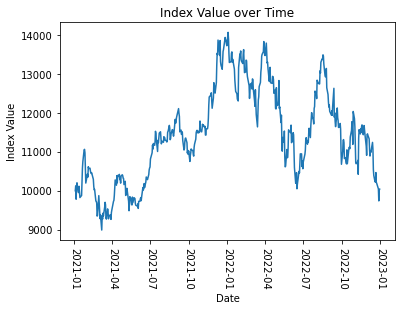

In [2]:
#will be able to simulate trades over a certain time period can be used to  
#combine with screener to back test if trading hypothesis/algorithm in place worked in a different time pd
import yfinance as yf
import matplotlib.pyplot as plt
ticker = "AAPL"
start_date = "2021-01-01"
end_date = "2022-12-31"
money = 10000

# Retrieve the stock data for the given ticker, date range, and close price
stock_data = yf.download(ticker, start=start_date, end=end_date)
print(stock_data['Close'][0])
# Divide the amount of money by the stock price on the start date
shares = money/stock_data['Close'][0]

# Multiply the stock data by the number of shares to purchase
stock_value = shares * stock_data['Close']

# Print the total value of the stock
print(stock_value)
plt.plot(stock_value)
plt.xlabel('Date')
plt.ylabel('Index Value')
plt.title('Index Value over Time')
plt.xticks(rotation=270)
plt.show()

